# Reviewer 2. Question 2.

Patients with CPVT frequently experience atrial tachyarrhythmias, which can lead to inappropriate ICD therapy and cerebral infarction. Both events could worsen the prognosis of thsese patients. Are there any hotspots associated with occurrence of atrial tachyarrhythmias?


In [4]:
import json

import pandas as pd
import numpy as np

In [5]:
from analysis.database import get_config, set_figure_size

config = get_config()

In [6]:
from pathlib import Path

data_all = pd.read_excel(
    Path.cwd().parent / "data" / f"individual_all_data-{config.version}.xlsx")

columns = [
    "individual_id",
    "Catecholaminergic polymorphic ventricular tachycardia 1",
    # "hgvs_string",
    "sequence_variant_id",
    "c_hgvs_string",
    "p_hgvs_string",
    "Atrial tachycardia",
    "exon_start",
    "domain",
    "subdomain",
    "publication_id",
    "title",
    "doi"
]

data = data_all[columns].copy()
data = data[
    data["Catecholaminergic polymorphic ventricular tachycardia 1"] == 1
    ]
data = data[
    data["Atrial tachycardia"].notna() & data["sequence_variant_id"].notna()]
data.head()

,individual_id,Catecholaminergic polymorphic ventricular tachycardia 1,sequence_variant_id,c_hgvs_string,p_hgvs_string,Atrial tachycardia,exon_start,domain,subdomain,publication_id,title,doi
2,3,1.0,677.0,NM_001035.3:c.14173T>A,NP_001026.2:p.(Tyr4725Asn),0.0,99.0,TM,pVSD,3,Structural abnormalities on cardiac magnetic r...,10.1016/j.jacep.2020.03.006
3,4,1.0,3671.0,NM_001035.3:c.14174A>G,NP_001026.2:p.(Tyr4725Cys),1.0,99.0,TM,pVSD,4,Genetic Background of Catecholaminergic Polymo...,10.1253/circj.cj-12-1460
27,28,1.0,7854.0,NM_001035.3:c.13933T>A,NP_001026.2:p.(Trp4645Arg),1.0,96.0,TM,pVSD,28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369
28,29,1.0,7854.0,NM_001035.3:c.13933T>A,NP_001026.2:p.(Trp4645Arg),0.0,96.0,TM,pVSD,28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369
32,33,1.0,7854.0,NM_001035.3:c.13933T>A,NP_001026.2:p.(Trp4645Arg),1.0,96.0,TM,pVSD,28,Genetic characterization of familial CPVT afte...,10.1177/1099800409333369


In [7]:
num_patients_cpvt_at = data.drop_duplicates("individual_id").groupby(
    "Atrial tachycardia"
).agg({
    "individual_id": "count"
})

num_patients_cpvt_at

,individual_id
Atrial tachycardia,
0.0,351
1.0,21


In [8]:
# print how many has nan hgvs strings
print("nan by cdna", data["c_hgvs_string"].isna().sum())
print("nan by exons", data["exon_start"].isna().sum())
print("nan by protein", data["p_hgvs_string"].isna().sum())

nan by cdna 30
nan by exons 36
nan by protein 5


In [9]:
import os

figures_dir = Path(
    os.path.join("..", "figures", config.version_for_dir, "analysis_15"))

if not figures_dir.exists():
    figures_dir.mkdir()
    print("Created directory:", figures_dir)
else:
    print("Directory exists:", figures_dir)

Directory exists: ../figures/0_3_3/analysis_15


In [10]:
data_at_patients = data[
    data["Atrial tachycardia"] == 1
    ]

In [13]:
data_at_patients[[
    "individual_id",
    # "hgvs_string",
    "c_hgvs_string",
    "p_hgvs_string",
    "title",
    "exon_start",
    "doi",
]].groupby("doi").agg({
    "individual_id": "count",
    # "hgvs_string": lambda x: str(x.unique()),
    "c_hgvs_string": lambda x: str(x.unique()),
    "p_hgvs_string": lambda x: str(x.unique()),
    "title": "first",
    "exon_start": lambda x: str(x.unique())
})

,individual_id,c_hgvs_string,p_hgvs_string,title,exon_start
doi,,,,,
10.1002/joa3.12280,1,['NM_001035.3:c.5128C>T'],['NP_001026.2:p.(His1710Tyr)'],Catecholaminergic polymorphic ventricular tach...,[37.]
10.1007/s00414-011-0658-2,1,['NM_001035.3:c.13735C>T'],['NP_001026.2:p.(His4579Tyr)'],Postmortem genetic testing of the ryanodine re...,[94.]
10.1016/j.hrthm.2014.04.037,1,['NM_001035.3:c.12476A>C'],['NP_001026.2:p.(Gln4159Pro)'],A novel RyR2 mutation in a 2-year-old baby pre...,[90.]
10.1016/j.rec.2014.04.023,7,['NM_001035.3:c.1259G>A'],['NP_001026.2:p.(Arg420Gln)'],"Non-ventricular, Clinical, and Functional Feat...",[14.]
10.1017/S1047951113001091,1,['NM_001035.3:c.12271G>A'],['NP_001026.2:p.(Ala4091Thr)'],Complex atrial arrhythmias as first manifestat...,[90.]
10.1111/j.1540-8167.2008.01211.x,1,[nan],['NP_001026.2:p.Gly3946Ala'],Sudden death in a young man with catecholamine...,[nan]
10.1136/heartjnl-2016-310509,2,['NM_001035.3:c.14600T>C' 'NM_001035.3:c.14553...,['NP_001026.2:p.(Ile4867Thr)' 'NP_001026.2:p.(...,Nationwide experience of catecholaminergic pol...,[102. 101.]
10.1177/1099800409333369,2,['NM_001035.3:c.13933T>A'],['NP_001026.2:p.(Trp4645Arg)'],Genetic characterization of familial CPVT afte...,[96.]
10.1253/circj.cj-12-1460,3,['NM_001035.3:c.14174A>G' 'NM_001035.3:c.14251...,['NP_001026.2:p.(Tyr4725Cys)' 'NP_001026.2:p.(...,Genetic Background of Catecholaminergic Polymo...,[99. 88.]


In [14]:
exon_mappable = data_at_patients["c_hgvs_string"].nunique()
exon_mappable

12

In [15]:
# group by exon start
counts_at = pd.DataFrame(data_at_patients.groupby("exon_start").size().rename(
    "count").sort_values(
    ascending=False)).reset_index()
counts_at["exon_start"] = counts_at["exon_start"].astype(int)
counts_at.head()

,exon_start,count
0,14,7
1,90,2
2,96,2
3,99,2
4,102,2


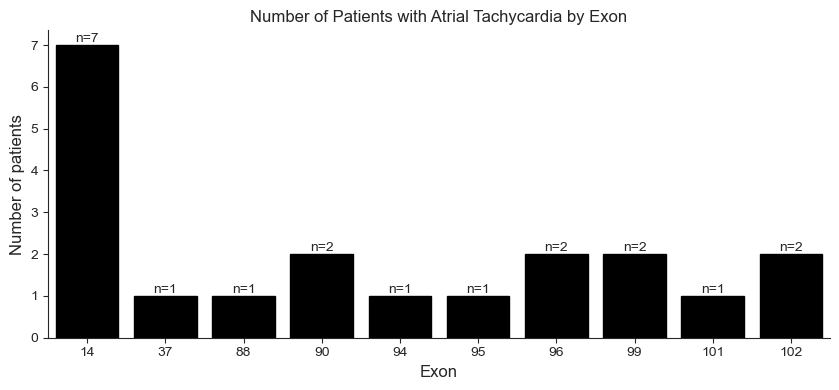

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")


def save_current_plot(name: str):
    for fmt in ["png", "pdf", "svg"]:
        plt.savefig(
            os.path.join(figures_dir, name + '.' + fmt), dpi=300)


with plt.rc_context({
    'figure.figsize': (8.5, 4),
}):
    ax = sns.barplot(x="exon_start", y="count", data=counts_at,
                     color=config.figure_palette.default_bar, edgecolor="black")

    ax.bar_label(ax.containers[0], fontsize=10, fmt="n=%g")

    set_figure_size(
        config.s_figure_3
    )

    save_current_plot("at_individuals_by_exon_location")
    plt.show()

In [21]:
var_counts = data.drop_duplicates("c_hgvs_string").groupby(
    "exon_start").size().rename("count").sort_values(ascending=False)

var_counts.head()

exon_start
90.0    19
94.0     7
8.0      6
14.0     6
47.0     6
Name: count, dtype: int64

In [19]:
var_counts.sum()

111

In [85]:
data[data["Atrial tachycardia"] == 1]["hgvs_string"].unique().shape

(12,)